# Feature Scaling Exercise -- Larry Larkin



## Read and clean-up dataset

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [24]:
filepath = "Datasets/DC_Properties.csv"

df_properties = pd.read_csv(filepath)
df_properties.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [25]:
#Remove unnamed column
df_properties = df_properties.drop(df_properties.columns[0], axis=1)  

In [26]:
df_properties

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,1957,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,1967,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,1950,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [27]:
df_properties.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [28]:
df_properties.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,9.821600e+04,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,7.061325e+06,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [45]:
# Identify and remove all non-numerical values
df_properties.dtypes

BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRESS            object
CITY      

In [48]:
df_properties=df_properties.drop(['HEAT','AC','SALEDATE','QUALIFIED','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','GIS_LAST_MOD_DTTM','SOURCE','FULLADDRESS','CITY','STATE','NATIONALGRID','ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','WARD','SQUARE','QUADRANT'], axis=1)

In [49]:
# Verify all non-numerical items have been removed
df_properties.dtypes

BATHRM            int64
HF_BATHRM         int64
NUM_UNITS       float64
ROOMS             int64
BEDRM             int64
AYB             float64
YR_RMDL         float64
EYB               int64
STORIES         float64
PRICE           float64
SALE_NUM          int64
GBA             float64
BLDG_NUM          int64
KITCHENS        float64
FIREPLACES        int64
USECODE           int64
LANDAREA          int64
CMPLX_NUM       float64
LIVING_GBA      float64
ZIPCODE         float64
LATITUDE        float64
LONGITUDE       float64
CENSUS_TRACT    float64
X               float64
Y               float64
dtype: object

In [50]:
#check if any missing values in the data
df_properties.count()

BATHRM          98216
HF_BATHRM       98216
NUM_UNITS       57900
ROOMS           98216
BEDRM           98216
AYB             98104
YR_RMDL         57674
EYB             98216
STORIES         57867
PRICE           98216
SALE_NUM        98216
GBA             57900
BLDG_NUM        98216
KITCHENS        57899
FIREPLACES      98216
USECODE         98216
LANDAREA        98216
CMPLX_NUM       40316
LIVING_GBA      40316
ZIPCODE         98216
LATITUDE        98216
LONGITUDE       98216
CENSUS_TRACT    98216
X               98115
Y               98115
dtype: int64

In [51]:
# Drop rows with any missing price data
df_properties = df_properties.loc[df_properties['PRICE'].notnull()]
df_properties

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,...,24,1680,NaN,NaN,20009.0,38.914680,-77.040832,4201.0,-77.040429,38.914881
2,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,...,24,1680,NaN,NaN,20009.0,38.914684,-77.040678,4201.0,-77.040429,38.914881
3,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,...,24,1680,NaN,NaN,20009.0,38.914683,-77.040629,4201.0,-77.040429,38.914881
5,3,2,1.0,10,5,1913.0,NaN,1972,4.0,1950000.0,...,11,2196,NaN,NaN,20009.0,38.914331,-77.039715,4201.0,-77.040429,38.914881
7,3,1,2.0,8,4,1906.0,2011.0,1972,3.0,1050000.0,...,24,1627,NaN,NaN,20009.0,38.915408,-77.040129,4201.0,-77.040429,38.914881
8,3,1,2.0,7,3,1908.0,2008.0,1967,2.0,1430000.0,...,24,1424,NaN,NaN,20009.0,38.915017,-77.039903,4201.0,-77.040429,38.914881
14,3,1,2.0,5,3,1917.0,2000.0,1967,2.0,1325000.0,...,24,1815,NaN,NaN,20009.0,38.915038,-77.039716,4201.0,-77.040429,38.914881
16,3,1,1.0,8,3,1908.0,2006.0,1967,2.0,1240000.0,...,11,1424,NaN,NaN,20009.0,38.915018,-77.039844,4201.0,-77.040429,38.914881
19,3,1,2.0,9,3,1908.0,2013.0,1969,2.0,592250.0,...,24,1424,NaN,NaN,20009.0,38.915019,-77.040138,4201.0,-77.040429,38.914881
20,3,1,1.0,14,5,1880.0,2009.0,1987,3.0,33232.0,...,13,2090,NaN,NaN,20009.0,38.911370,-77.033774,5201.0,-77.033366,38.911716


In [54]:
#Verify rows with missing price values were removed
df_properties.count()

BATHRM          98216
HF_BATHRM       98216
NUM_UNITS       57900
ROOMS           98216
BEDRM           98216
AYB             98104
YR_RMDL         57674
EYB             98216
STORIES         57867
PRICE           98216
SALE_NUM        98216
GBA             57900
BLDG_NUM        98216
KITCHENS        57899
FIREPLACES      98216
USECODE         98216
LANDAREA        98216
CMPLX_NUM       40316
LIVING_GBA      40316
ZIPCODE         98216
LATITUDE        98216
LONGITUDE       98216
CENSUS_TRACT    98216
X               98115
Y               98115
dtype: int64

In [55]:
# Reset index
df_properties.reset_index()

,index,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
0,0,4,0,2.0,8,4,1910.0,1988.0,1972,3.0,...,24,1680,NaN,NaN,20009.0,38.914680,-77.040832,4201.0,-77.040429,38.914881
1,2,3,1,2.0,9,5,1910.0,2009.0,1984,3.0,...,24,1680,NaN,NaN,20009.0,38.914684,-77.040678,4201.0,-77.040429,38.914881
2,3,3,1,2.0,8,5,1900.0,2003.0,1984,3.0,...,24,1680,NaN,NaN,20009.0,38.914683,-77.040629,4201.0,-77.040429,38.914881
3,5,3,2,1.0,10,5,1913.0,NaN,1972,4.0,...,11,2196,NaN,NaN,20009.0,38.914331,-77.039715,4201.0,-77.040429,38.914881
4,7,3,1,2.0,8,4,1906.0,2011.0,1972,3.0,...,24,1627,NaN,NaN,20009.0,38.915408,-77.040129,4201.0,-77.040429,38.914881
5,8,3,1,2.0,7,3,1908.0,2008.0,1967,2.0,...,24,1424,NaN,NaN,20009.0,38.915017,-77.039903,4201.0,-77.040429,38.914881
6,14,3,1,2.0,5,3,1917.0,2000.0,1967,2.0,...,24,1815,NaN,NaN,20009.0,38.915038,-77.039716,4201.0,-77.040429,38.914881
7,16,3,1,1.0,8,3,1908.0,2006.0,1967,2.0,...,11,1424,NaN,NaN,20009.0,38.915018,-77.039844,4201.0,-77.040429,38.914881
8,19,3,1,2.0,9,3,1908.0,2013.0,1969,2.0,...,24,1424,NaN,NaN,20009.0,38.915019,-77.040138,4201.0,-77.040429,38.914881
9,20,3,1,1.0,14,5,1880.0,2009.0,1987,3.0,...,13,2090,NaN,NaN,20009.0,38.911370,-77.033774,5201.0,-77.033366,38.911716


In [56]:
#Check for outliers in PRICE that will skew normalization
df_properties['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

In [57]:
#Remove any properties whose value exceeds the 75% percentile ($652,000)
df_master=df_properties[df_properties['PRICE']<652000]

In [58]:
df_master.shape

(73660, 25)

In [59]:
df_master['PRICE'].head(5)

19    592250.0
20     33232.0
25     20000.0
32    130500.0
37    339500.0
Name: PRICE, dtype: float64

## Z-score Standardization


In [60]:
# Use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

# Fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'PRICE' is in double set of square brackets in order to make it a dataframe
price_zscore = scaler.fit_transform(df_master[['PRICE']])

In [61]:
price_zscore

array([[ 1.64711236],
       [-1.82445299],
       [-1.90662522],
       ...,
       [ 0.55257982],
       [ 1.69524074],
       [-0.69503203]])

In [62]:
#mean and standard deviation of z-score standardized 'PRICE' column
price_zscore.mean(), price_zscore.std()

(-8.025679556779845e-17, 1.0)

In [63]:
#because fit_transform made an array, we have to change it back into a Series type (pandas dataframe column)
price_z_col = pd.Series(price_zscore.reshape(-1))

In [64]:
#first 5 rows of z-score standardized PRICE column
price_z_col.head()

0    1.647112
1   -1.824453
2   -1.906625
3   -1.220408
4    0.077506
dtype: float64

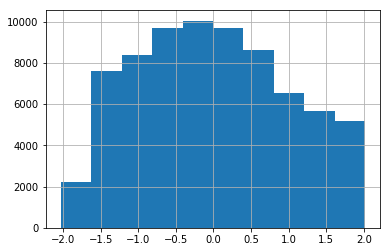

In [65]:
# Frequency count plot of 'PRICE' column (z-score standardization)
price_z_col.hist()

## Min-Max Scaling


In [70]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [72]:
#use MinMaxScaler function and fit_transform function on the 'PRICE' column
#'PRICE' is in double set of square brackets in order to make it a dataframe
PRICE_minmax = minmax_sc.fit_transform(df_master[['PRICE']])

In [73]:
#mean and standard deviation of Min-Max 'PRICE' column
PRICE_minmax.mean(), PRICE_minmax.std()

(0.5016396285469907, 0.24701318291386587)

In [75]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
PRI_mm_col = pd.Series(PRICE_minmax.reshape(-1))
PRI_mm_col.head()

0    0.908498
1    0.050976
2    0.030678
3    0.200183
4    0.520785
dtype: float64

In [76]:
#verify the range is between 0 and 1
PRI_mm_col.min(), PRI_mm_col.max()

(0.0, 1.0)

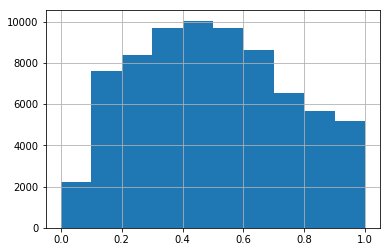

In [77]:
PRI_mm_col.hist()